<h1 style="text-align: center">
Machine Learning HW1 </br>
Bias & Variance
</h1>

In [1]:
name = "Radin Cheraghi"
student_number = "401105815"

## Bias & variance

The purpose of this notebook is to illustrate the bias-variance trade-off when learning regression models from data.

### Training data generation

First we will write a function to generate a random sample. The data generation model is the following:
$$y = f(x) + \epsilon \\ \epsilon \sim \mathcal{N}(0, 1)$$

Text(0.5, 1.0, 'Samples along the actual function')

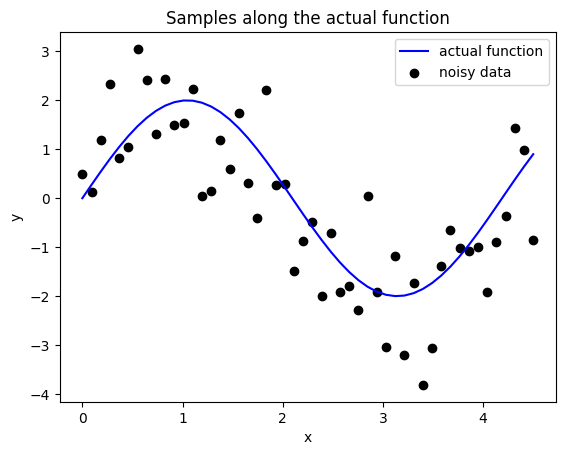

In [8]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    ## TODO
    e = np.random.randn(size)
    x, y = f(size)
    return x, y, y + e

## TODO: sample 50 points and plot them along with the actual function
np.random.seed(42)
x, y, y_sample = sample(50)

plt.plot(x, y, label = 'actual function', color = 'blue')
plt.scatter(x, y_sample, label = 'noisy data', color = 'black')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Samples along the actual function")

### Model fitting

We will use least square regression (LSR) to fit a polynomial to the data. Actually, we will use multivariate linear regression, over a dataset built in the following way: <br>
For each sample $x_i$ we build a vector $(1, x_i, x_i^2, \: \dots,\: x_i^n)$ and we use LSR to fit a function $g: R^{n+1} \rightarrow R^n$ to the training data.



Text(0.5, 1.0, 'Samples along the actual function')

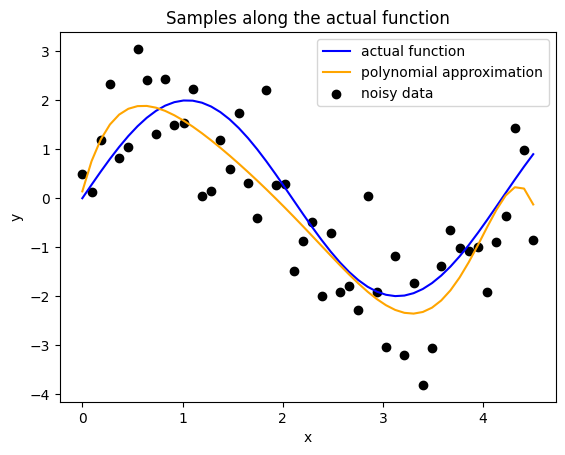

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree

    returns: the fitted model
    '''
    ## TODO
    polynomial = PolynomialFeatures(degree)
    vandermonde_matrix = polynomial.fit_transform(x.reshape(-1,1))
    model = LinearRegression()
    model.fit(vandermonde_matrix, y)
    return model

def apply_polynomial(model, x, degree):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample

    returns: the polynomial applied on x
    '''
    ## TODO
    polynomial = PolynomialFeatures(degree)
    vandermonde_matrix = polynomial.fit_transform(x.reshape(-1,1))
    y = model.predict(vandermonde_matrix)
    return y

## TODO: fit a model of degree 8 with the previous sampled data. plot them along with the data and the actual function
model = fit_polynomial(x, y_sample, 8)
y_pred = apply_polynomial(model, x, 8)
plt.plot(x, y, label = 'actual function', color = 'blue')
plt.plot(x, y_pred, label = 'polynomial approximation', color = 'orange')
plt.scatter(x, y_sample, label = 'noisy data', color = 'black')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Samples along the actual function")

### Model Averaging

The following code generates a set of samples of the same size and fits a poynomial to each sample. Then the average model is calculated. All the models, including the average model, are plotted.

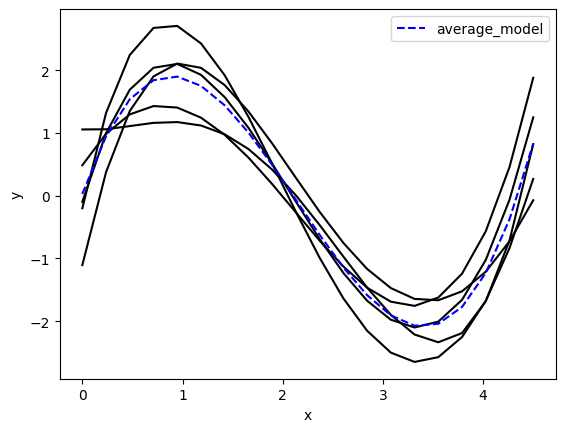

In [19]:
degree = 4
n_samples = 20
n_models = 5
avg_y = np.zeros(n_samples)
## TODO
y_samples = []
np.random.seed(42)
for i in range(n_models):
  x, _, y_sample = sample(n_samples)
  model = fit_polynomial(x, y_sample, degree)
  y_pred = apply_polynomial(model, x, degree)
  plt.plot(x, y_pred, color = 'black')
  avg_y += y_pred
avg_y /= n_models
plt.plot(x, avg_y, color = 'blue', label = 'average_model', linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

### Calculating Bias and Variance

Same as previous example, we generate several samples and fit a polynomial to each one. We calculate bias and variance among models for different polynomial degrees. generate about 20 samples for polynomials of degree 1 to 15. calculate the average model by averaging large enough number of models <br>
You can find more info about Bias&Variance [here](https://serokell.io/blog/bias-variance-tradeoff) and [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

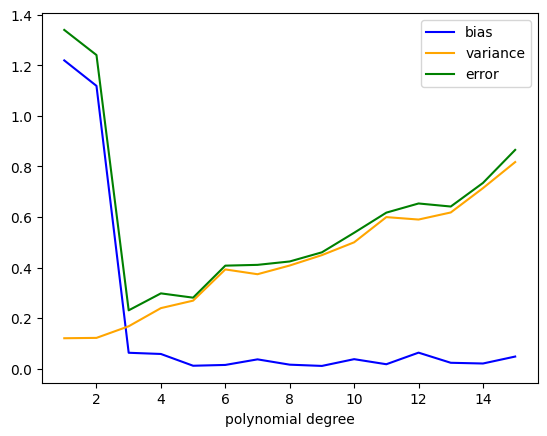

In [80]:
## TODO
from sklearn.metrics import mean_squared_error
degrees = range(1,16)
n_samples = 20
n_points = 20
biases = []
vars = []
avg_errors = []
for degree in degrees:
  predictions = []
  y_samples = []
  errors = []
  for i in range(n_samples):
    x, y_true, y_sample = sample(n_points)
    model = fit_polynomial(x, y_sample, degree)
    y_pred = apply_polynomial(model, x, degree)
    predictions.append(y_pred)
    error = mean_squared_error(y_true, y_pred)
    errors.append(error)
  predictions = np.array(predictions)
  avg_y = np.mean(predictions, axis = 0)
  errors = np.array(errors)
  avg_error = np.mean(errors)
  avg_errors.append(avg_error)
  bias = np.mean((avg_y - y_true)**2)
  var = np.mean(np.var(predictions, axis = 0))
  biases.append(bias)
  vars.append(var)

plt.plot(degrees, biases, label = 'bias', color = 'blue')
plt.plot(degrees, vars, label = 'variance', color = 'orange')
plt.plot(degrees, avg_errors, label = 'error', color = 'green')
plt.xlabel("polynomial degree")
plt.legend()

Plot the polynomials of degree 1 to 10 along with data points to visually see the impact of increasing model complexity on training data

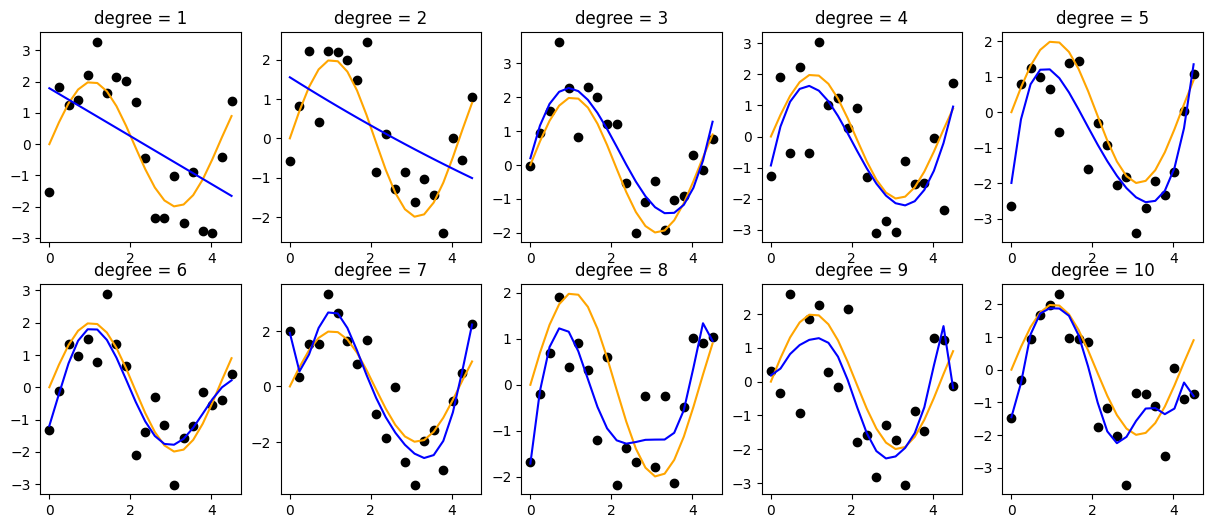

In [40]:
n_samples = 20
## TODO
degrees = range(1,11)
plt.figure(figsize = (15,6))
for degree in degrees:
  x, y, y_sample = sample(n_samples)
  model = fit_polynomial(x, y_sample, degree)
  y_pred = apply_polynomial(model, x, degree)
  plt.subplot(2,5,degree)
  plt.plot(x, y, color = 'orange')
  plt.plot(x, y_pred, color = 'blue')
  plt.scatter(x, y_sample, color = 'black')
  plt.title(f'degree = {degree}')

### Validation Data

Since in a real setup we don't have access to the real $f$ function, we cannot exactly calculate the error. However we can approximate it using cross validation. We generate two sets of samples, a training set and a validation set. The validation set is used to calculate an estimation of the error. <br>

For each degree, generate a set of training data and test data. Train the model on the train data and calculate the train and test data. Plot the results.

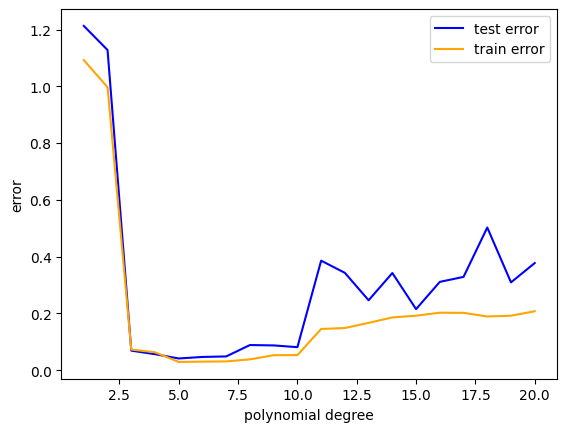

In [92]:
## TODO
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

n_samples = 100
degrees = range(1,21)
test_errors = []
train_errors = []
X,y = f(n_samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
y_train_sampled = y_train + np.random.randn(y_train.shape[0])

for degree in degrees:
  model = fit_polynomial(X_train, y_train_sampled, degree)

  y_pred_train = apply_polynomial(model, X_train, degree)
  y_pred_test = apply_polynomial(model, X_test, degree)

  train_error = mean_squared_error(y_train, y_pred_train)
  test_error = mean_squared_error(y_test, y_pred_test)

  train_errors.append(train_error)
  test_errors.append(test_error)

plt.plot(degrees, test_errors, label = 'test error', color = 'blue')
plt.plot(degrees, train_errors, label = 'train error', color = 'orange')
plt.xlabel("polynomial degree")
plt.ylabel("error")
plt.legend()

### Regularization

Another way to deal with the model complexity is using regularization. A regularizer is a term that penalizes the model complexity and is part of the loss function. the next portion of code shows how the norm of the coefficients of the linear regression model is increased when the complexity of the model (polynomial degree) increases.

Text(0, 0.5, '||w||')

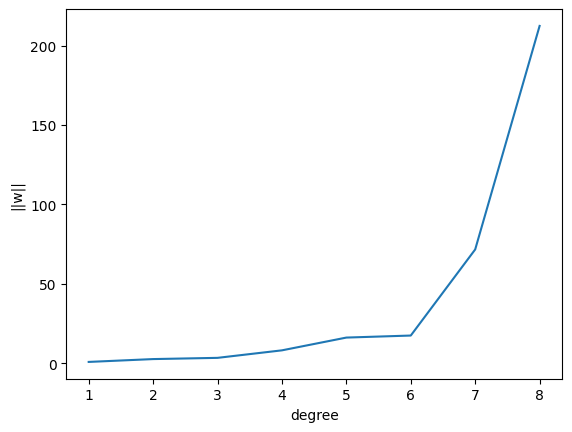

In [75]:
## TODO
n_samples = 20
degrees = range(1,9)
x, y, y_sampled = sample(n_samples)
norms = []

for degree in degrees:
  model = fit_polynomial(x, y_sampled, degree)
  norm = np.linalg.norm(model.coef_)
  norms.append(norm)

plt.plot(degrees, norms)
plt.xlabel("degree")
plt.ylabel("||w||")

### Ridge Regression

Ridge regression finds a regression model by minimizing the following loss function:
$$\underset{w}{minimize} \left\lVert y - Xw \right\rVert^2 + \alpha \left\lVert w \right\rVert^2 $$
where $X$ and $y$ are the input matrix and labels respectively. The parameter $\alpha$ controls the amount of regularization. Now repeat the validation experiment using ridge regression. Use a fixed polynomial degree (e.g. 10) and find a reasonably good $\alpha$ using line search. You can find more about hyperparameter tuning [here](https://en.wikipedia.org/wiki/Hyperparameter_optimization)

0.24489795918367346


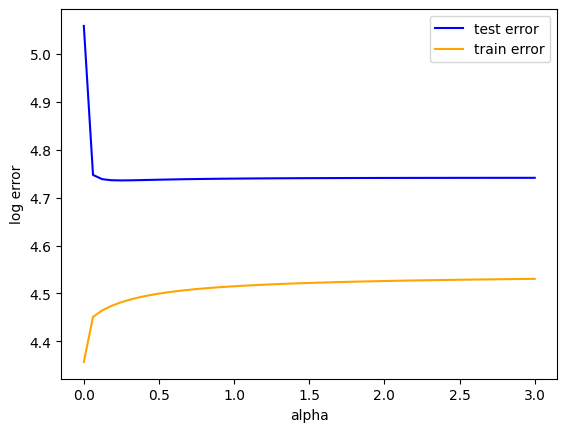

In [132]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def fit_polynomial_Ridge(x, y, degree, alpha):
    polynomial = PolynomialFeatures(degree)
    vandermonde_matrix = polynomial.fit_transform(x.reshape(-1,1))
    model = Ridge(alpha = alpha)
    model.fit(vandermonde_matrix, y)
    return model

def apply_polynomial_Ridge(model, x, degree):
    polynomial = PolynomialFeatures(degree)
    vandermonde_matrix = polynomial.fit_transform(x.reshape(-1,1))
    y = model.predict(vandermonde_matrix)
    return y

n_samples = 50
degree = 10
test_errors = []
train_errors = []
X,y = f(n_samples)
y_sample = y + np.random.randn(y.shape[0]) * 10
X_train, X_test, y_train, y_test = train_test_split(X, y_sample, test_size = 0.3, random_state = 42)
# y_train_sampled = y_train + np.random.randn(y_train.shape[0])
alpha_values = np.linspace(0, 3, 50)

for alpha in alpha_values:
  model = fit_polynomial_Ridge(X_train, y_train, degree, alpha)

  y_pred_train = apply_polynomial_Ridge(model, X_train, degree)
  y_pred_test = apply_polynomial_Ridge(model, X_test, degree)

  train_error = np.log(mean_squared_error(y_train, y_pred_train))
  test_error = np.log(mean_squared_error(y_test, y_pred_test))

  train_errors.append(train_error)
  test_errors.append(test_error)

best_alpha = alpha_values[np.argmin(test_errors)]
print(best_alpha)
plt.plot(alpha_values, test_errors, label = 'test error', color = 'blue')
plt.plot(alpha_values, train_errors, label = 'train error', color = 'orange')
plt.xlabel("alpha")
plt.ylabel("log error")
plt.legend()
